# 12 Clipping

In this lesson we will learn how to to clip different geometries.

[Link to lesson](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-13-clipping/lesson-13-clipping.html)

## About the data

We will use three datasets in this lesson. 

The first dataset is a [TIGER shapefile of the US states from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). Follow these steps to download shapefile with the United States' states:

You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

The second dataset we'll use is [Natural Earth's simple medium scale populated places dataset](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). We can obtain this dataset by downloading the shapefile (choose the one that says "simple (less columns)").

The third dataset we'll use is [Natural Earth's road dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/). 
We can obtain this dataset by downloading the shapefile 

We will combine these datasets to create the following map of infrastructure in Alaska:

## Import data

Let's start by loading our libraries and then importing the datasets we will use.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box

"""
Set environment variable 'PROJ_LIB' to specify the path for the PROJ library
Resolves ERROR 1: PROJ: proj_create_from_database
"""""
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

pd.set_option("display.max.columns", None)

# -------------------------------------------------------
# Import data

# Path to course data folder
data_folder_fp = os.path.join('/',
                              'courses',
                              'EDS220', 
                              'data')

# Import and simplify states polygons
states = gpd.read_file(os.path.join(data_folder_fp, 
                                    'tl_2022_us_state', 
                                    'tl_2022_us_state.shp'))

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join(data_folder_fp,
                                    'ne_50m_populated_places',
                                    'ne_50m_populated_places.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join(data_folder_fp,
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

## Check-in
Use a for loop to iterate over the three geo-dataframes we imported and change their column names to lower caps.

In [2]:
# Change column names to lower case 

df_list = [states, places, roads]

for dataframes in df_list:
    dataframes.columns = dataframes.columns.str.lower()

## Preppare Alaska multipolygon 

This is a geospatial dataset, you should always at least check the following: 

CRS, plotting the data, the head of the dataset 

In [5]:
states.crs

<Geographic 2D CRS: GEOGCS["GCS_North_American_1983",DATUM["D_North_Am ...>
Name: NAD83
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


<Axes: >

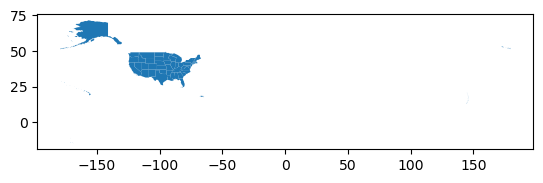

In [7]:
states.plot()

For this lesson, we are only interested in Alaska 

<Axes: >

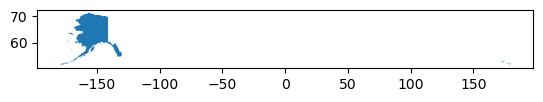

In [10]:
alaska = states[states.name =='Alaska']
alaska.plot()

Notice that the way the Alaska multipolygon is plotted under the NAD83/EPSG:4269 CRS separates the islands and unnaturally elongates the map. To fix this, we will reproject the Alaska geo-dataframe to the EPSG:3338 CRS. This CRS is a projected CRS, better suited for working with data from Alaska:

In [11]:
# Reproject to CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')

# Inspect the new CRS
print('Is this CRS projected? ', alaska.crs.is_projected)
alaska.crs

Is this CRS projected?  True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

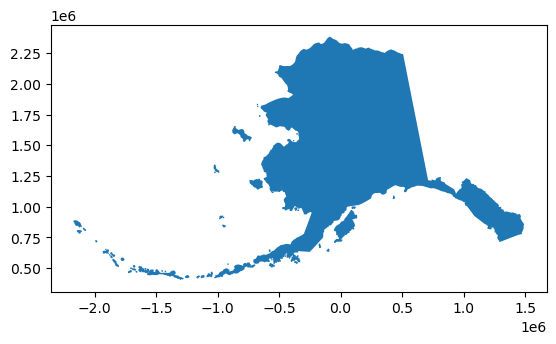

In [12]:
# See new projection 
alaska.plot()

## Prepare populated places points 

Let's explore the populated places data

In [13]:
print(f"CRS: {places.crs}")

places.head(3)

CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,max_pop10,max_pop20,max_pop50,max_pop300,max_pop310,max_natsca,min_areakm,max_areakm,min_areami,max_areami,min_perkm,max_perkm,min_permi,max_permi,min_bbxmin,max_bbxmin,min_bbxmax,max_bbxmax,min_bbymin,max_bbymin,min_bbymax,max_bbymax,mean_bbxc,mean_bbyc,timezone,un_fid,pop1950,pop1955,pop1960,pop1965,pop1970,pop1975,pop1980,pop1985,pop1990,pop1995,pop2000,pop2005,pop2010,pop2015,pop2020,pop2025,pop2050,min_zoom,wikidataid,wof_id,capalt,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,ne_id,name_fa,name_he,name_uk,name_ur,name_zht,geonamesid,fclass_iso,fclass_us,fclass_fr,fclass_ru,fclass_es,fclass_cn,fclass_tw,fclass_in,fclass_np,fclass_pk,fclass_de,fclass_gb,fclass_br,fclass_il,fclass_ps,fclass_sa,fclass_eg,fclass_ma,fclass_pt,fclass_ar,fclass_jp,fclass_ko,fclass_vn,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,fclass_tlc,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q4940747,1141906025,0,Bombo,Bombo,Bombo,Bombo,Bombo,Бомбо,邦博,None,بومبو,বোম্বো,Μπόμπο,बॉम्बो,Bombo,Bombo,Bombo,ボンボ,봄보,Bombo,Bombo,Bombo,Bombo,Bombo,1159113923,بمبو,בומבו,Бомбо,بومبو,邦博,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Africa/Kampala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q500107,421174009,0,Fort Portal,Fort Portal,Fort Portal,Fort Portal,Fort Portal,Форт-Портал,波特爾堡,None,فورت بورتال,ফোর্ট পোর্টাল,Φορτ Πορτάλ,फोर्ट पोर्टल,Fort Portal,Fort Portal,Fort Portal,フォート・ポータル,포트포털,Fort Portal,Fort Portal,Fort Portal,Fort Portal,Fort Portal,1159113959,فورت پورتال,פורט פורטל,Форт-Портал,فورٹ پورٹل,波特爾堡,233476.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe/Rome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q3543,101752567,0,Potenza,Potenza,Potenza,Potenza,Potenza,Потенца,波坦察,None,بوتنسا,পোটেঞ্জা,Ποτέντσα,पोटेंजा,Potenza,Potenza,Potenza,ポテンツァ,포텐차,Potenza,Potenza,Potenza,Potenza,Potenza,1159117259,پوتنزا,פוטנצה,Потенца,پوتینتسا,波坦察,3170027.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (15.79900 40.64200)


<Axes: >

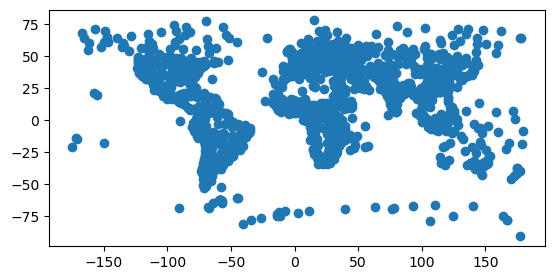

In [14]:
places.plot()

This dataset is in WGS 84 / EPSG: 4226 CRS. 

This is the most widely used CRS for global data. Let's try and plot it with alaska 

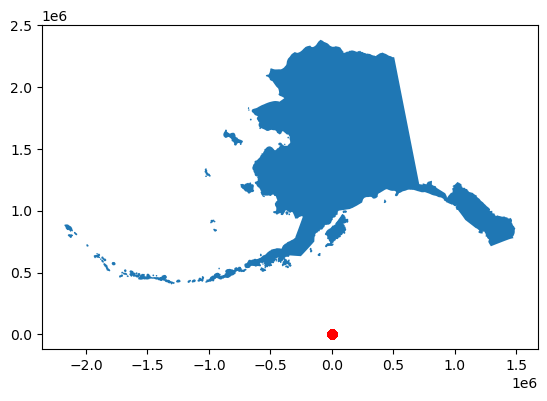

In [15]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color = "red")

plt.show()

The CRSs do not match so the map does not give us important information. 

Let's update the CRS with an `if-else` statement:

In [16]:
if alaska.crs == places.crs:
    print('CRSs match')
else: 
    places = places.to_crs(alaska.crs)
    assert places.crs == alaska.crs
    print('We matched the CRSs')

We matched the CRSs


Remember that an `if-else` statement a control strucutre, it allows code to make decisions: 

- it checks a condition 
- if that condition is true, it executes one block of code (the `if` block)
- if the condition is false, it executes a different block (the `else` block)


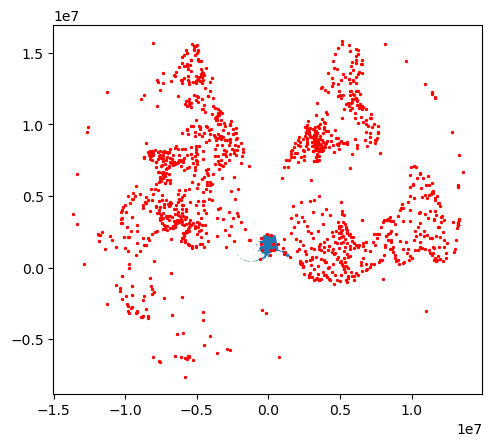

In [17]:
# View map with the same CRS
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color = "red", markersize=2)

plt.show()

## Clipping 

**Clipping** means using a polygons(s) to select only geospatial data within them. This is simple with a `geopandas.DataFrame` using the `clip()` function. 

```python
updated_gdf = geopandas.clip(geodf, mask)
```

where 
- `updated_gdf` = output of the method, the intersection of the geometries in `geodf` and the `mask`
- `geodf` = the geopanda df we want to clip 
- `mask` = geopanda df with the polygons we want to use for clipping. Needs to be in the same CRS as the geodf 

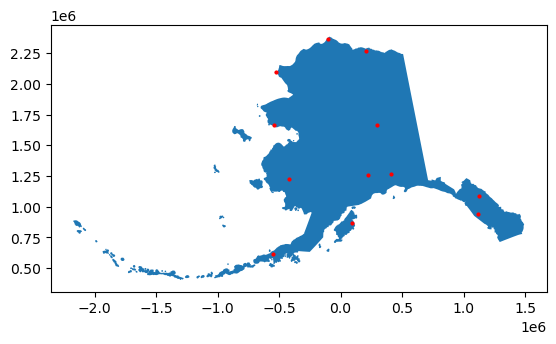

In [20]:
# Clip places to alaska 
ak_places = gpd.clip(places, alaska)

# View map 
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_places.plot(ax=ax, color = "red", markersize=4)

plt.show()

## Prepare roads data 

In [23]:
print(f"CRS: {roads.crs}")

roads.head(3)

CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


<Axes: >

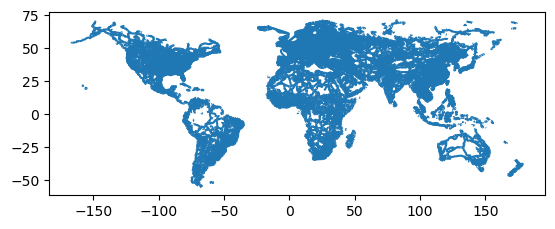

In [24]:
roads.plot()

To use for the alaska data, we need to convert the CRS and clip to the Alaska geometries. 

First, we will subset to only the US roads. It is **best practice** to reduce your tabular data before reducing via geometries 

<Axes: >

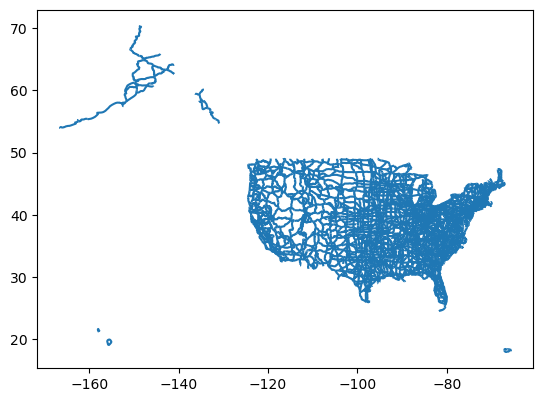

In [25]:
usa_roads = roads[roads.sov_a3 == "USA"]
usa_roads.plot()

We will now compose functions to clip `usa_roads` and `alaska` multipolygon 

In [26]:
# Clip usa_roads to alaska geometry 
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)

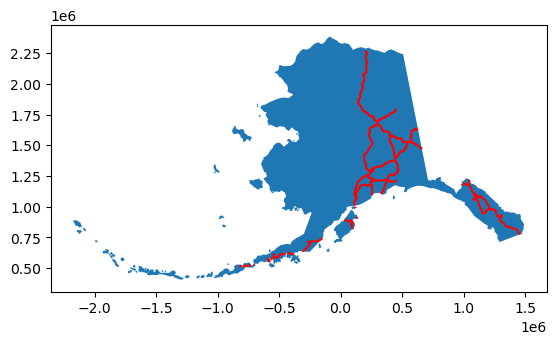

In [27]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_roads.plot(ax=ax, color="red")

plt.show()

Notice how the lines break on the small islands? However, in the usa_roads there are no broken lines. This should make us suspect we are leaving data out and clipping exactly to the polygons in alaska is not quite what we want.


## Clipping with a bounding box 

We will clip the `usa_roads` geo-dataframe with the bounding box of `alaska` instead of its polygons. To create a bounding box, we first use the `box()` function we imported from `shapely.geometry`. The syntax for `box()` is:

```python 
box(minx, miny, maxx, maxy)
```

If we want to create a shapely polygon from the bounds of a geo-dataframe gdf, a more straightforward syntax is:

```python
box(*gdf.total_bounds)
```

<class 'shapely.geometry.polygon.Polygon'>


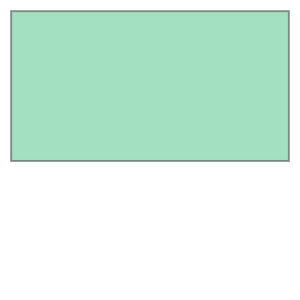

In [28]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

### * = unpacking operator 

This * is an unpacking operator. Think about it as unpacking the lements of alaska.total_bounds and passing them one by one to the parameters minx miny maxx maxy of the box() function. 

In [30]:
# Create a geo-dataframe from the bounding box 
ak_bbox = gpd.GeoDataFrame(geometry= [bbox], # Assign geometry 
                          crs = alaska.crs) # Assign CRS 

In [31]:
print(type(ak_bbox))
ak_bbox

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


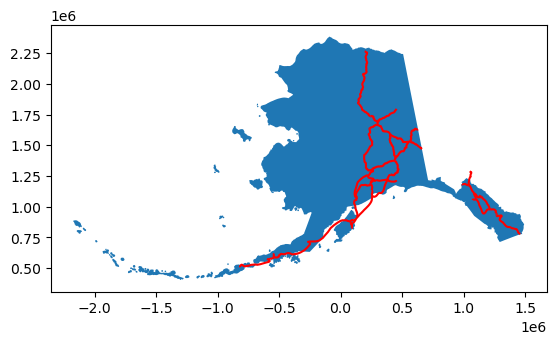

In [32]:
# Using bounding box to clip roads to Alaska 
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)

# Plot complete roads 
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_complete_roads.plot(ax=ax, color="red")

plt.show()

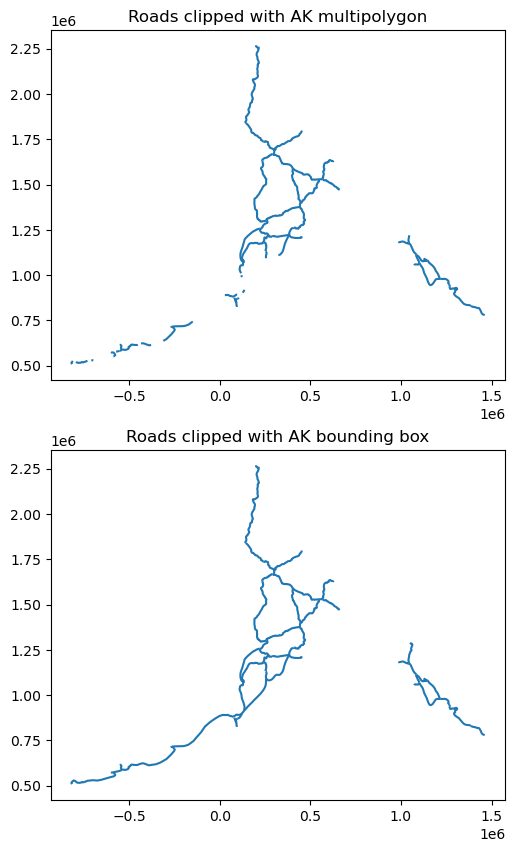

In [33]:
# Compare the two clipping methods 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ak_roads.plot(ax=ax1)
ax1.set_title('Roads clipped with AK multipolygon')

ak_complete_roads.plot(ax=ax2)
ax2.set_title('Roads clipped with AK bounding box')

plt.show()

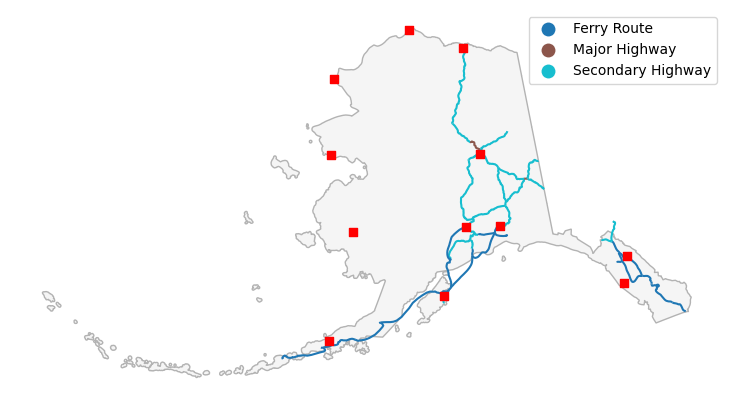

In [38]:
# Plot all the layers together

fig, ax = plt.subplots(figsize =(11,5))
ax.axis('off')

# Alaska outline
alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

# Roads 
ak_complete_roads.plot(ax=ax,
                       zorder=1, # Specify layer plotting order 
                      column='type',
                      legend=True)

# Populated places 
ak_places.plot(ax=ax, 
               zorder=2, # Places city marks in front of roads
              color='red',
              marker='s') # Square marker



plt.show()

Let's update the map below so that the labels of the cities (Anchorage and Valdez) do not overall. Prehaps an if statement would be helpful 

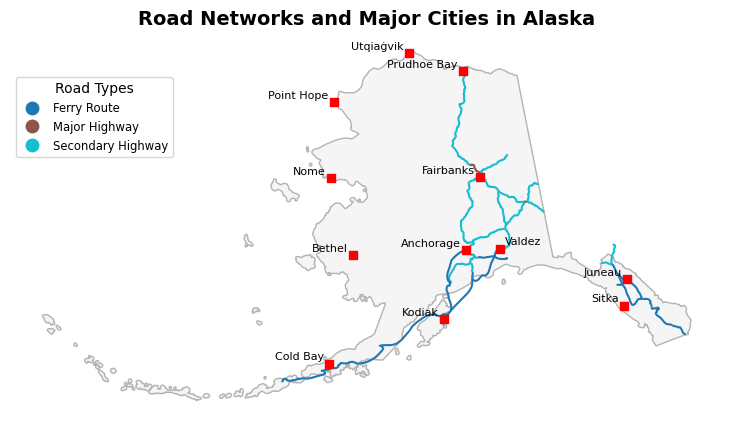

In [54]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )
# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if name != 'Valdez': # Skip Valdez
        ax.text(x-30000, y+20000, name, fontsize=8, ha='right')

# Plot Valdez individually 
valdez = ak_places[ak_places['name']=='Valdez']
ax.text(valdez.geometry.x.iloc[0]+30000,
       valdez.geometry.y.iloc[0]+20000,
       'Valdez',
       fontsize=8,
       ha='left')

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()